In [1]:
import pandas as pd
import os
import numpy as np
import glidertools as gt

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import cmocean
import netCDF4
from netCDF4 import Dataset
import xarray as xa

import operator as op
plt.rcParams['font.family'] = 'arial'
plt.rcParams['axes.linewidth'] = 0.1

In [2]:
# full path to datafiles
filenames = "/Users/anjalishah/Desktop/EcoFOCI2024/Data/Mooring_Sites/M4/M4_ncdf/22bs4a_ecf_0020m.nc"

# pull out only science variables
names = [
    'chlor_fluorescence_QC',
    'latitude',
    'longitude',
    'time'
]

mooring_data_23m = xa.open_dataset(filenames)


In [3]:
def calc_chlor_QC(mooring_data, flag): 
    QC = mooring_data.chlor_fluorescence_QC.values[:, 0, 0, 0]
    time = mooring_data.chlor_fluorescence.time
    chlor = mooring_data.chlor_fluorescence.values[:, 0, 0, 0]
    final_chlor = np.zeros(len(time))
    print(np.unique(QC)) # identify flagged values (=4, bad data)
    op.countOf(QC, flag) #count how many occurrences
    for i, qc in enumerate(QC):
        if qc==4:
            final_chlor[i]=0
        else:
            final_chlor[i]=chlor[i]
    return final_chlor, time

In [4]:
final_chlor_23m, time_23m = calc_chlor_QC(mooring_data_23m, 4)

[0. 1. 4.]


In [5]:
filenames = "/Users/anjalishah/Desktop/EcoFOCI2024/Data/Mooring_Sites/M4/M4_ncdf/22bs4a_ecf_0010m.nc"
# pull out only science variables
names = [
    'chlor_fluorescence_QC',
    'latitude',
    'longitude',
    'time'
]

mooring_data_13m = xa.open_dataset(filenames)
final_chlor_13m, time_13m = calc_chlor_QC(mooring_data_13m, 4)

print(final_chlor_13m)

[0. 1. 4.]
[1.81905  1.770475 1.627095 ... 3.67495  4.00593  4.491345]


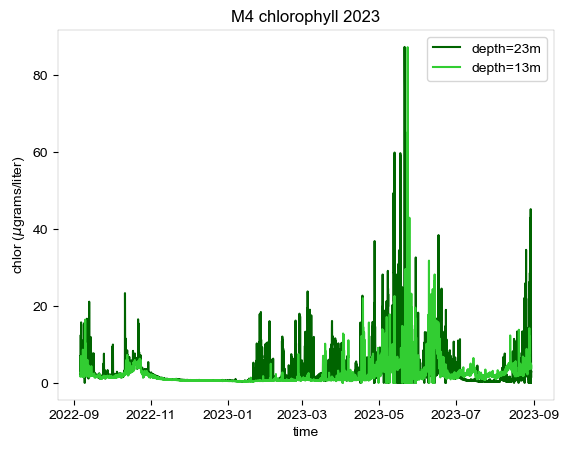

In [6]:
plt.plot(time_23m, final_chlor_23m, color='darkgreen')
plt.plot(time_13m, final_chlor_13m, color='limegreen')
plt.title('M4 chlorophyll 2023')
plt.xlabel('time')
plt.ylabel('chlor (${\mu}$grams/liter)')
plt.legend(['depth=23m', 'depth=13m'])

Text(0, 0.5, 'chlor (${\\mu}$grams/liter)')

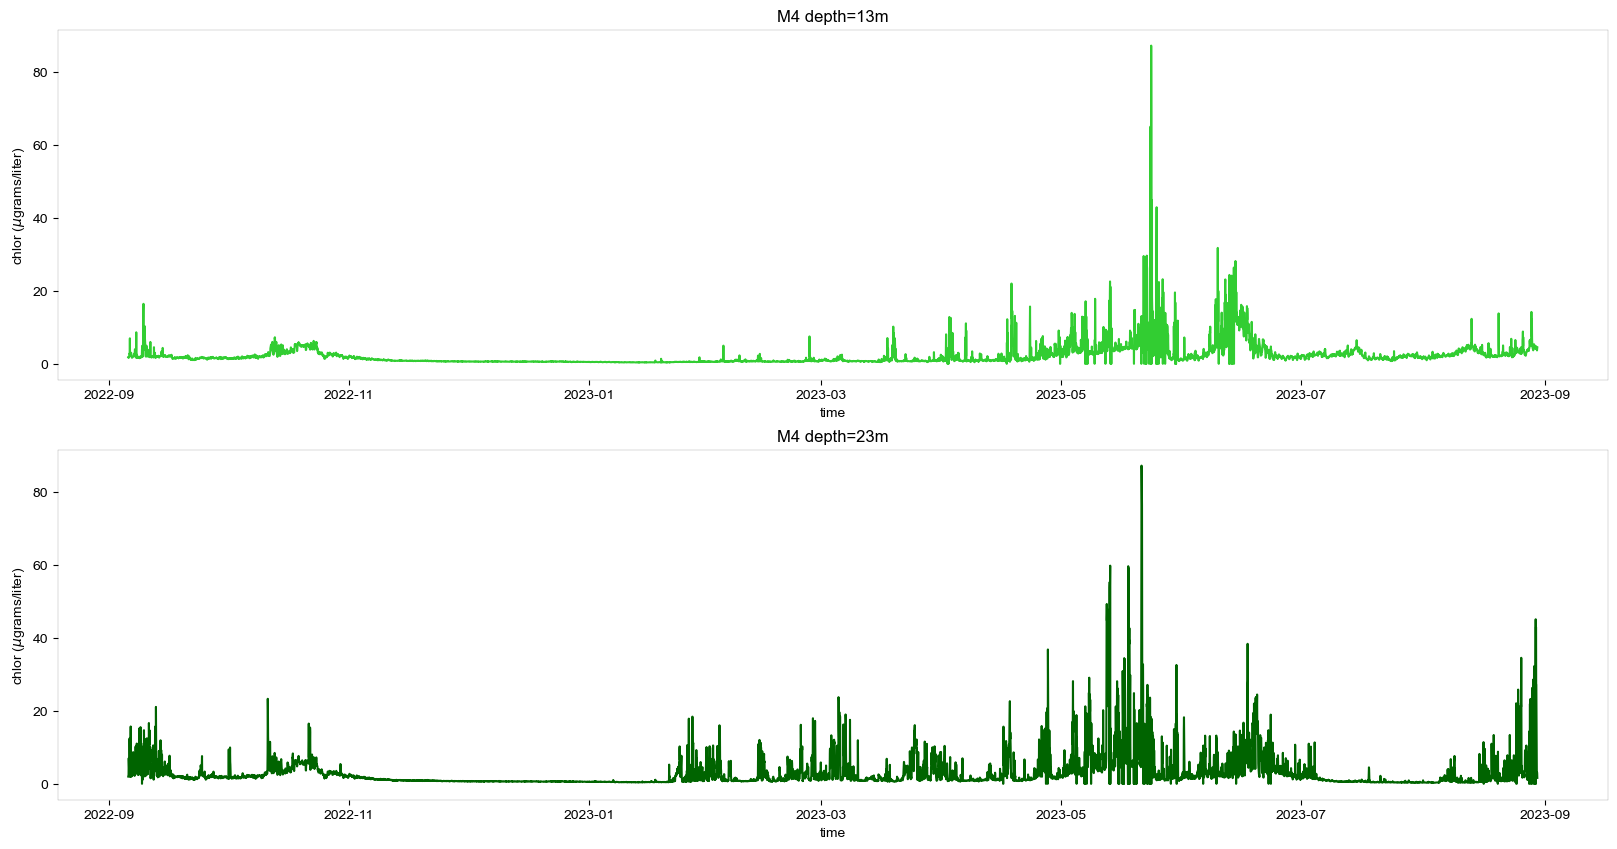

In [7]:

fig, ax = plt.subplots(2,1, figsize=(20,10))

ax[0].plot(time_13m, final_chlor_13m, color='limegreen')
ax[0].set_title('M4 depth=13m')
ax[0].set_xlabel('time')
ax[0].set_ylabel('chlor (${\mu}$grams/liter)')

ax[1].plot(time_23m, final_chlor_23m, color='darkgreen')
ax[1].set_title('M4 depth=23m')
ax[1].set_xlabel('time')
ax[1].set_ylabel('chlor (${\mu}$grams/liter)')


                        chlor
2023-05-14 00:00:00  4.652480
2023-05-14 01:00:00  4.322170
2023-05-14 02:00:00  4.015980
2023-05-14 03:00:00  4.011737
2023-05-14 04:00:00  3.682767
2023-05-14 05:00:00  3.695273
2023-05-14 06:00:00  3.948980
2023-05-14 07:00:00  3.609067
2023-05-14 08:00:00  3.490030
2023-05-14 09:00:00  3.416777
2023-05-14 10:00:00  3.647927
2023-05-14 11:00:00  3.574673
2023-05-14 12:00:00  3.633187
2023-05-14 13:00:00  3.598347
2023-05-14 14:00:00  3.634750
2023-05-14 15:00:00  3.722743
2023-05-14 16:00:00  4.295593
2023-05-14 17:00:00  4.071143
2023-05-14 18:00:00  3.680757
2023-05-14 19:00:00  5.822970
2023-05-14 20:00:00  4.360583
2023-05-14 21:00:00  4.507537
2023-05-14 22:00:00  4.433390
2023-05-14 23:00:00  4.220330


/var/folders/mv/05qc0kg10pv1rck13f9ncn6m0000gn/T/ipykernel_39279/2138810157.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(np.arange(0, 24, 1))
/var/folders/mv/05qc0kg10pv1rck13f9ncn6m0000gn/T/ipykernel_39279/2138810157.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(np.arange(0, 24, 1))


Text(0.5, 0.98, 'OCULUS Overlap on 5/14')

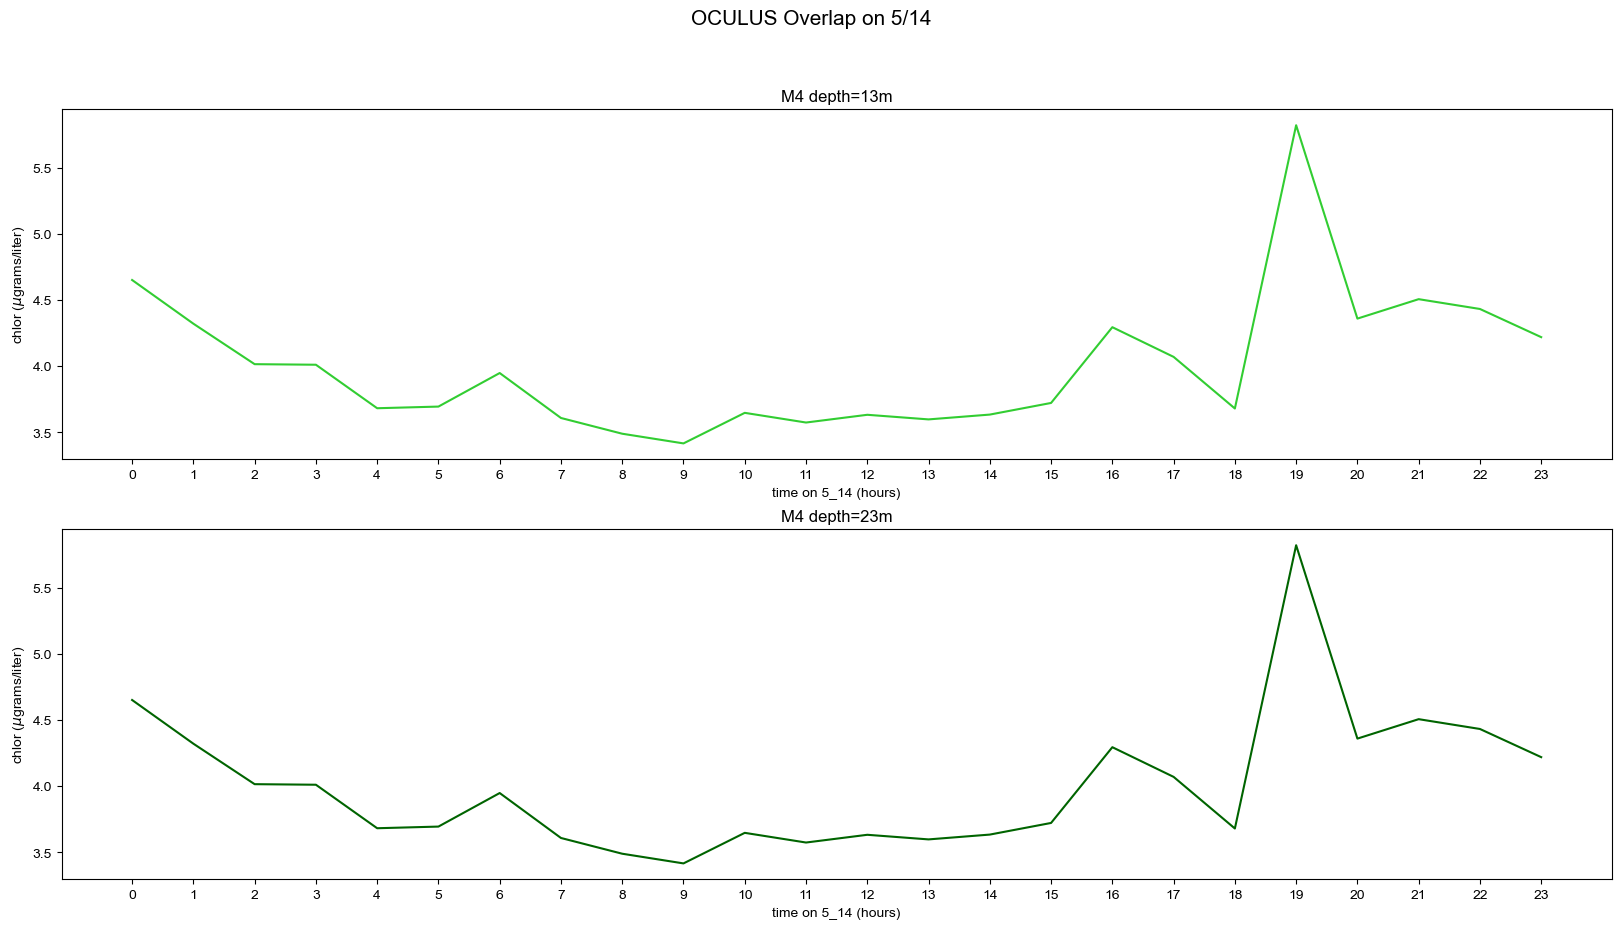

In [33]:
timeseries_chlor_13m = pd.DataFrame(data=final_chlor_13m, 
              index=time_13m,    # 1st column as index
              columns=['chlor'])
timeseries_chlor_13m.index = timeseries_chlor_13m.index.astype(str)
mask = timeseries_chlor_13m.index.str.contains('2023-05-14')
OCULUS_overlap_13m = timeseries_chlor_13m[mask]

timeseries_chlor_23m = pd.DataFrame(data=final_chlor_13m, 
              index=time_23m,    # 1st column as index
              columns=['chlor'])
timeseries_chlor_23m.index = timeseries_chlor_23m.index.astype(str)
OCULUS_overlap_23m = timeseries_chlor_23m[mask]
print(OCULUS_overlap_23m)

fig, ax = plt.subplots(2,1, figsize=(20,10))

ax[0].plot(OCULUS_overlap_13m, color='limegreen')
ax[0].set_title('M4 depth=13m')
ax[0].set_xlabel('time on 5_14 (hours)')
ax[0].set_xticklabels(np.arange(0, 24, 1))
ax[0].set_ylabel('chlor (${\mu}$grams/liter)')

ax[1].plot(OCULUS_overlap_23m, color='darkgreen')
ax[1].set_title('M4 depth=23m')
ax[1].set_xlabel('time on 5_14 (hours)')
ax[1].set_xticklabels(np.arange(0, 24, 1))
ax[1].set_ylabel('chlor (${\mu}$grams/liter)')

fig.suptitle('OCULUS Overlap on 5/14', fontsize=15)

In [8]:
time_13m

<xarray.DataArray 'time' (time: 8595)>
array(['2022-09-05T22:00:00.000000000', '2022-09-05T23:00:00.000000000',
       '2022-09-06T00:00:00.000000000', ..., '2023-08-29T22:00:00.000000000',
       '2023-08-29T23:00:00.000000000', '2023-08-30T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2022-09-05T22:00:00 ... 2023-08-30

Text(0.5, 1.0, 'M4 chlorophyll fluorescence 2023')

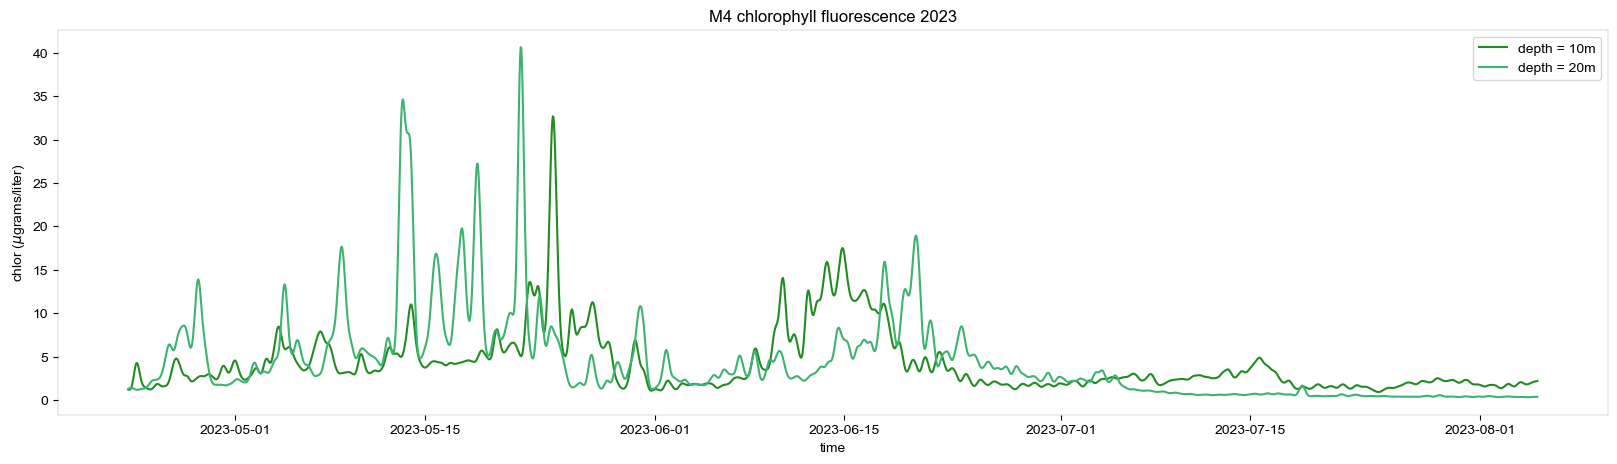

In [13]:
fig, ax = plt.subplots(figsize=(20,5))
final_chlor_13m = (pd.DataFrame(final_chlor_13m)).rolling(7).mean()
final_chlor_23m = (pd.DataFrame(final_chlor_23m)).rolling(7).mean()
ax.plot(time_13m[5500:8000], final_chlor_13m[5500:8000], color='forestgreen')
ax.plot(time_23m[5500:8000], final_chlor_23m[5500:8000], color='mediumseagreen')

ax.set_xlabel('time')
ax.set_ylabel('chlor (${\mu}$grams/liter)')
ax.legend(['depth = 10m', 'depth = 20m'])
ax.set_title('M4 chlorophyll fluorescence 2023')

In [107]:
#add in ice data

#M4 data has no ice... still useful code
from datetime import datetime

M4_ice = pd.read_csv('/Users/anjalishah/Desktop/EcoFOCI2024/Data/Mooring_Sites/M4_ice/meaniceinbox_bs4.csv')

#align the dates correctly 
padded_days = []
M4_ice_dates = []

for i in M4_ice['Day'].values:
    padded_days.append(str(i).rjust(3, '0')) #i-1 since indexing starts at zero but our dates start at 1
    M4_ice_dates.append(datetime.strptime(str(padded_days[i-1]), '%j'))

M4_ice.set_index([M4_ice_dates], inplace=True)
print(M4_ice)

366
